In [1]:
import torch
import torchvision 
import torch.nn as nn 
import torch.optim as optim
from torchvision import datasets,models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,random_split 

In [2]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [4]:
dataset_dir = r'F:\Dataset for Images\Satelite images\data'

In [6]:
dataset=datasets.ImageFolder(root=dataset_dir,transform=transform)

In [7]:
train_size=int(0.85*len(dataset))
test_size=len(dataset)-train_size

In [8]:
train_dataset,test_dataset=random_split(dataset,[train_size,test_size])

In [9]:
train_loader=DataLoader(dataset=train_dataset,shuffle=True,batch_size=32)
test_loader=DataLoader(dataset=test_dataset,shuffle=False,batch_size=32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


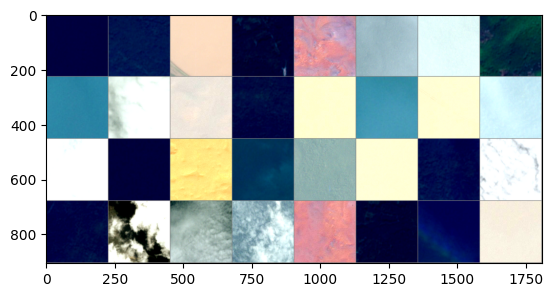

Corresponding labels: tensor([3, 2, 0, 2, 1, 0, 0, 2, 3, 0, 1, 2, 1, 3, 1, 0, 0, 3, 1, 3, 0, 1, 2, 0,
        2, 0, 0, 0, 1, 2, 3, 1])


In [11]:
import matplotlib.pyplot as plt 
import numpy as np

def imshow(img):
    img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    

dataiter=iter(train_loader)
images,labels=next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('Corresponding labels:', labels)


In [13]:
num_classes=len(dataset.classes)
model=models.resnet18(pretrained=True)
model.fc=nn.Linear(model.fc.in_features,num_classes)
model=model.to(device)

In [14]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [18]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total = 0
    correct = 0
    
    total_batches = len(train_loader)
    batches_per_part = total_batches // 20  
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Get predictions and calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print updates every time we've processed a part of the dataset (1/20th)
        if (i + 1) % batches_per_part == 0 or (i + 1) == total_batches:
            part = (i + 1) // batches_per_part if (i + 1) % batches_per_part == 0 else 20
            partial_loss = running_loss / (i + 1)
            partial_accuracy = 100 * correct / total
            print(f'Epoch [{epoch+1}/{num_epochs}], Part [{part}/20], Loss: {partial_loss:.4f}, Accuracy: {partial_accuracy:.2f}%')

    # Calculate final loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}] Completed, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%\n')


Epoch [1/10], Part [1/20], Loss: 0.6317, Accuracy: 72.32%
Epoch [1/10], Part [2/20], Loss: 0.4474, Accuracy: 83.71%
Epoch [1/10], Part [3/20], Loss: 0.3966, Accuracy: 86.01%
Epoch [1/10], Part [4/20], Loss: 0.3236, Accuracy: 88.73%
Epoch [1/10], Part [5/20], Loss: 0.2723, Accuracy: 90.45%
Epoch [1/10], Part [6/20], Loss: 0.2728, Accuracy: 90.55%
Epoch [1/10], Part [7/20], Loss: 0.2613, Accuracy: 90.94%
Epoch [1/10], Part [8/20], Loss: 0.2706, Accuracy: 90.40%
Epoch [1/10], Part [9/20], Loss: 0.2609, Accuracy: 90.82%
Epoch [1/10], Part [10/20], Loss: 0.2465, Accuracy: 91.29%
Epoch [1/10], Part [11/20], Loss: 0.2395, Accuracy: 91.60%
Epoch [1/10], Part [12/20], Loss: 0.2338, Accuracy: 91.85%
Epoch [1/10], Part [13/20], Loss: 0.2292, Accuracy: 92.14%
Epoch [1/10], Part [14/20], Loss: 0.2272, Accuracy: 92.32%
Epoch [1/10], Part [15/20], Loss: 0.2285, Accuracy: 92.41%
Epoch [1/10], Part [16/20], Loss: 0.2198, Accuracy: 92.75%
Epoch [1/10], Part [17/20], Loss: 0.2213, Accuracy: 92.80%
Epoch 

In [21]:
model.eval()
test_loss=0.0
correct=0
total=0
with torch.no_grad():
    for images,labels in test_loader:
        images=images.to(device)
        labels=labels.to(device)
        outputs=model(images)
        loss=criterion(outputs,labels)
        test_loss+=loss.item()
        _,predicted=outputs.max(1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()

test_loss=test_loss/len(test_loader)
test_accuracy=100.*correct/total
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Test Loss: 0.3303, Test Accuracy: 89.70%
